<a href="https://www.kaggle.com/code/bhaktipatil25/stress-prediction?scriptVersionId=123821718" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-stress-prediction/Stress.csv


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix


In [3]:
data=pd.read_csv("/kaggle/input/human-stress-prediction/Stress.csv")

In [4]:
data.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         2838 non-null   object 
 1   post_id           2838 non-null   object 
 2   sentence_range    2838 non-null   object 
 3   text              2838 non-null   object 
 4   label             2838 non-null   int64  
 5   confidence        2838 non-null   float64
 6   social_timestamp  2838 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 155.3+ KB


In [6]:
data.isnull().sum()

subreddit           0
post_id             0
sentence_range      0
text                0
label               0
confidence          0
social_timestamp    0
dtype: int64

In [7]:
data["label"].value_counts()

1    1488
0    1350
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

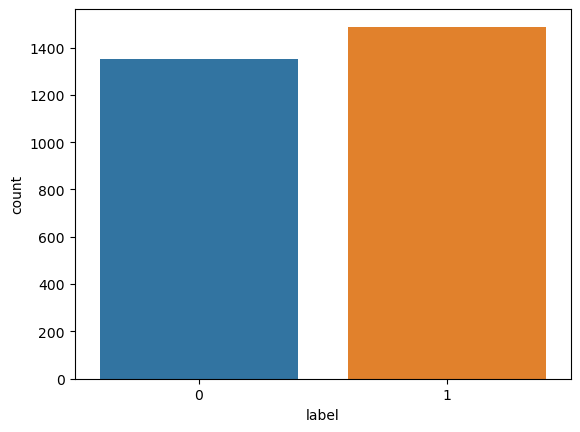

In [8]:
sns.countplot(x=data["label"])

In [9]:
data.shape

(2838, 7)

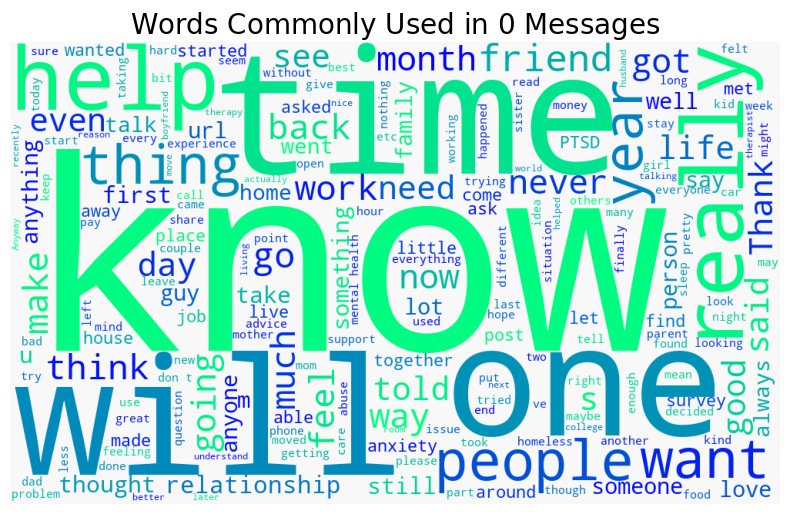

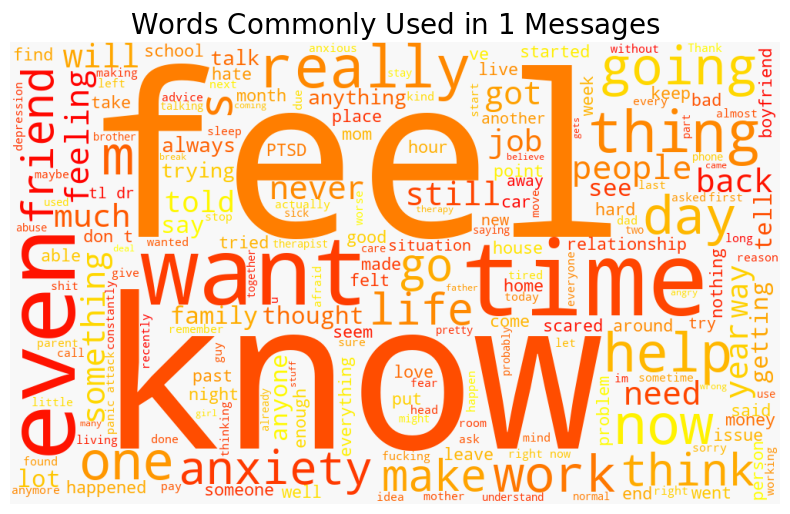

In [10]:
#WordCloud for the Sentiments
from wordcloud import WordCloud
for label, cmap in zip([0,1],
                       ['winter', 'autumn', 'magma', 'viridis', 'plasma']):
    text = data.query('label == @label')['text'].str.cat(sep=' ')
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in ${label}$ Messages", size=20)
    plt.show()

In [11]:
data["new_label"] = data["label"].map({0: "No Stress", 1: "Stress"})
dataset = data[["text", "label"]]
datas=data[["text","new_label"]]

In [12]:
dataset

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1
...,...,...
2833,"* Her, a week ago: Precious, how are you? (I i...",0
2834,I don't have the ability to cope with it anymo...,1
2835,In case this is the first time you're reading ...,0
2836,Do you find this normal? They have a good rela...,0


In [13]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(datas["text"],datas["new_label"],test_size=0.2)

In [14]:
print(Xtrain.shape,Ytrain.shape,Xtest.shape,Ytest.shape)

(2270,) (2270,) (568,) (568,)


In [15]:
# Building Pipeline for raw text transformation
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
    ])

In [16]:
model=clf.fit(Xtrain,Ytrain)

In [17]:
print("Accuracy is:",model.score(Xtrain,Ytrain))

Accuracy is: 0.8696035242290749


In [18]:
print("Accuracy is :",model.score(Xtest,Ytest))

Accuracy is : 0.6883802816901409


In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(dataset["text"],dataset["label"],test_size=0.2)
from sklearn.naive_bayes import BernoulliNB
# model = BernoulliNB()

clf1 = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', BernoulliNB()),
    ])
model1=clf1.fit(xtrain, ytrain)

In [20]:
print("Accuracy is:",model1.score(xtrain,ytrain))

Accuracy is: 0.9374449339207048


In [21]:
print("Accuracy is :",model1.score(xtest,ytest))

Accuracy is : 0.7394366197183099
